## Multi-Class Prediction of Obesity Risk

In [35]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Load the datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [7]:
# Display the first few rows of the training data to check if it's loaded correctly
print("Training Data:")
print(train_data.head())

Training Data:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesda

In [9]:
#Shape of the dataset
train_data.shape,test_data.shape

((20758, 18), (13840, 17))

In [10]:
#Information of Dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
#Stats Analysis of data
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
#Checking Missing Values
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [13]:
test_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [14]:
#Separating Features and Target:
#Features (X_train)and the target variable (y_train) are separated from the training data.
X_train = train_data.drop("NObeyesdad", axis=1)
y_train = train_data["NObeyesdad"]

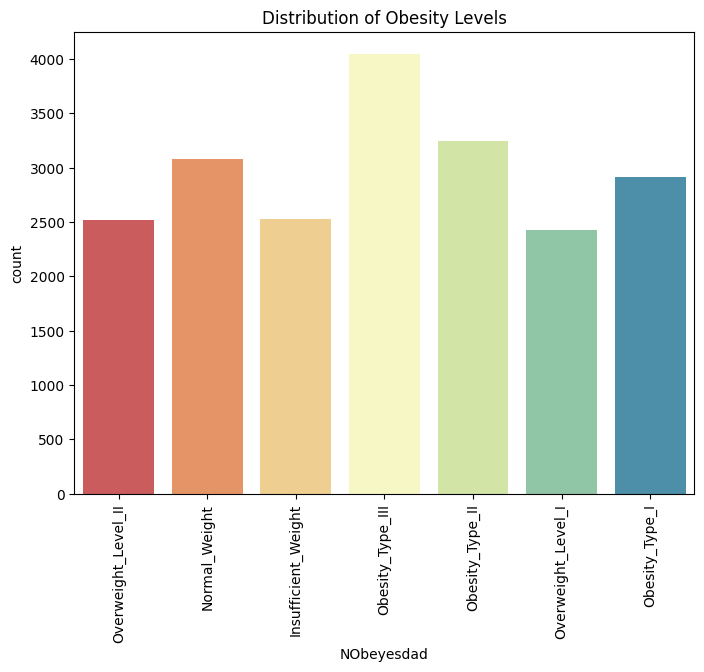

In [36]:
# Visualize the distribution of the target variable (NObeyesdad)

plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=train_data,palette='Spectral')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

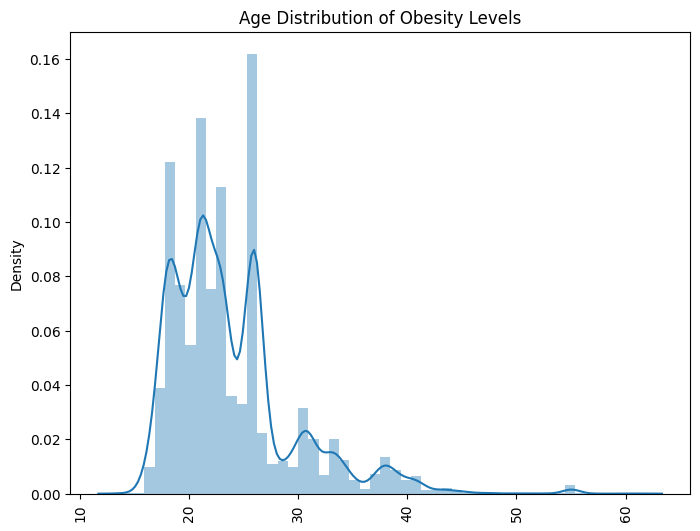

In [45]:
#Gender Distribution with Target Varaible
plt.figure(figsize=(8, 6))
sns.distplot(x=train_data['Age'])
plt.title('Age Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

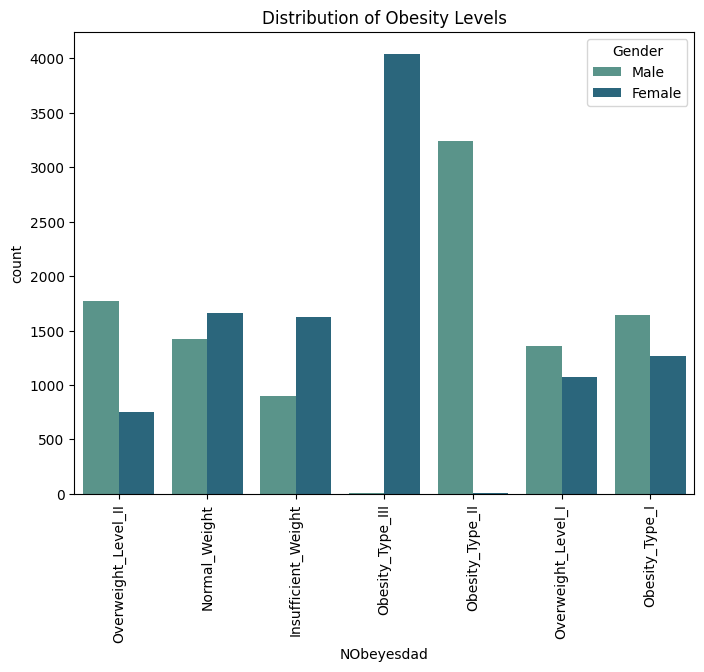

In [39]:
#Gender Distribution with Target Varaible
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', hue='Gender',data=train_data,palette='crest')
plt.title('Gender Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Display the first few rows of the preprocessed training data
print("\nPreprocessed Training Data:")
print(X_train.head())


Preprocessed Training Data:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS  
0  

In [19]:
# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [20]:
numerical_features

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [21]:
categorical_features

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

#### Preprocessing Pipeline

In [22]:
#pipeline

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# Transform the training data
X_train = preprocessor.fit_transform(X_train)

In [24]:
# Display the first few rows of the preprocessed training data to check if it's transformed correctly
print("\nPreprocessed Training Data (After Transformation):")
print(X_train[:5]) # Display the first 5 rows


Preprocessed Training Data (After Transformation):
[[-1.73196737  0.10569857 -0.00282826 -0.23571264 -0.83627898  0.31468392
   1.20659365 -1.17114146  0.59743795  0.          1.          0.
   1.          0.          1.          0.          0.          1.
   0.          1.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   0.        ]
 [-1.73180049 -1.0270519  -1.60629083 -1.17093118 -0.83627898  0.3383641
  -0.0483493   0.02177483  0.63651292  1.          0.          0.
   1.          0.          1.          0.          1.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.          1.          0.          0.          0.
   0.        ]
 [-1.73163361 -1.0270519   0.12845138 -1.43001211 -1.06033151 -1.91342278
  -0.19564431 -0.13802227  1.75523929  1.          0.          0.
   1.          0.          1.          0.          0.          1.
   0.          1.          0.        

In [25]:
# Split the preprocessed training data into training and validation sets

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
#Shapes
X_train.shape, X_train_split.shape,X_val_split.shape

((20758, 31), (16606, 31), (4152, 31))

In [29]:
# Display the first few rows of the split datasets to check if they're created correctly
X_train_split,X_val_split

(array([[-0.07017317, -1.20286263,  0.79893738, ...,  0.        ,
          0.        ,  0.        ],
        [-0.4234588 , -0.20643844,  0.60868383, ...,  0.        ,
          1.        ,  0.        ],
        [-0.18114858, -0.35223353,  1.37008745, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [-0.83248246, -0.49961971, -0.91908277, ...,  0.        ,
          1.        ,  0.        ],
        [-1.5884503 ,  0.37943394, -0.57404706, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.90390724,  2.48879562,  0.84853089, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[-0.01026314,  0.37943394, -0.58489349, ...,  0.        ,
          1.        ,  0.        ],
        [-1.05209696, -1.0270519 ,  0.56986803, ...,  0.        ,
          1.        ,  0.        ],
        [-0.2200317 , -0.08465241,  0.15044204, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 0.19016012, -0.20179827, -0.82850875, ...,  

In [30]:
### Model Selection and Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [31]:
print("\nTraining Set:")
print(X_train_split[:5])  # Display the first 5 rows

print("\nValidation Set:")
print(X_val_split[:5])  # Display the first 5 rows


Training Set:
[[-0.07017317 -1.20286263  0.79893738  0.34543758  1.03917121  0.3383641
  -0.0483493   2.40760742  0.63651292  0.          1.          0.
   1.          0.          1.          1.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          1.          1.          0.          0.          0.
   0.        ]
 [-0.4234588  -0.20643844  0.60868383 -1.25140824 -0.83627898  1.75608469
  -0.0483493   1.21469113  0.63651292  0.          1.          0.
   1.          0.          1.          0.          0.          1.
   0.          1.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          1.
   0.        ]
 [-0.18114858 -0.35223353  1.37008745  1.29411405  1.03917121  0.16939591
  -0.63124127 -0.28852536 -1.02434359  0.          1.          0.
   1.          0.          1.          0.          0.          1.
   0.          1.          0.          1.          0.          0.
   1.   

In [32]:
#Train the Model

logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
svm_model = make_pipeline(StandardScaler(), SVC(probability=True))


In [33]:
# evaluate models
models = [('Logistic Regression', logistic_model), ('SVM', svm_model)]
for name, model in models:
    model.fit(X_train_split, y_train_split)
    accuracy = accuracy_score(y_val_split, model.predict(X_val_split))
    report = classification_report(y_val_split, model.predict(X_val_split))

    print(f"{name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 40)

Logistic Regression Model:
Accuracy: 0.8649
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.93      0.91       524
      Normal_Weight       0.85      0.80      0.82       626
     Obesity_Type_I       0.81      0.84      0.83       543
    Obesity_Type_II       0.96      0.97      0.96       657
   Obesity_Type_III       0.99      1.00      1.00       804
 Overweight_Level_I       0.72      0.72      0.72       484
Overweight_Level_II       0.73      0.69      0.71       514

           accuracy                           0.86      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.86      0.86      4152

----------------------------------------
SVM Model:
Accuracy: 0.8425
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.87      0.88       524
      Normal_Weight       0.75      0.80    

In [34]:
## Hyperparameter Cross Vaalidation
# Model Comparison using cross validation

print("\nModel Comparison:")
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")


Model Comparison:
Logistic Regression: Mean Accuracy: 0.8627, Standard Deviation: 0.0062
SVM: Mean Accuracy: 0.8385, Standard Deviation: 0.0070


### Ensemble Learning

In [46]:
 #creating a Hard Voting Ensemble using votingclassifier
ensemble_model = VotingClassifier(estimators=[('Logistic Regression', logistic_model), ('SVM', svm_model)], voting='hard')
ensemble_model.fit(X_train_split, y_train_split)

VotingClassifier(estimators=[('Logistic Regression',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=1000))])),
                             ('SVM',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(probability=True))]))])

### Trained Models
- Evaluate the individual models
- Evaluate the ensemble model

In [47]:
logistic_accuracy = accuracy_score(y_val_split, logistic_model.predict(X_val_split))
svm_accuracy = accuracy_score(y_val_split, svm_model.predict(X_val_split))

ensemble_accuracy = accuracy_score(y_val_split, ensemble_model.predict(X_val_split))
ensemble_report = classification_report(y_val_split, ensemble_model.predict(X_val_split))

print("\nLogistic Model Accuracy:", logistic_accuracy)
print("SVM Model Accuracy:", svm_accuracy)

print("\nHard Voting Ensemble Model:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print("Classification Report:")
print(ensemble_report)


Logistic Model Accuracy: 0.8648843930635838
SVM Model Accuracy: 0.8424855491329479

Hard Voting Ensemble Model:
Accuracy: 0.8514
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.95      0.89       524
      Normal_Weight       0.78      0.80      0.79       626
     Obesity_Type_I       0.79      0.87      0.82       543
    Obesity_Type_II       0.96      0.96      0.96       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.71      0.67      0.69       484
Overweight_Level_II       0.76      0.60      0.67       514

           accuracy                           0.85      4152
          macro avg       0.83      0.84      0.83      4152
       weighted avg       0.85      0.85      0.85      4152



In [48]:
#Testing Predictions
#Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [49]:
# Replace 'NObeyesdad' with the actual name of your target variable column
target_column = 'NObeyesdad'

In [50]:
# Extract features and target variable
X = train_data.drop(target_column, axis=1)
y = train_data[target_column]

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Regularization and Polynonial Features
# Define preprocessing and logistic regression model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Gender'])  # Check that 'Gender' is correct
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2', C=1.0))
])

# Fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [53]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7398843930635838


In [54]:
# Generate predictions
y_pred = model.predict(X_test)

In [55]:
# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.86      0.93      0.89       524
      Normal_Weight       0.59      0.72      0.65       626
     Obesity_Type_I       0.58      0.66      0.62       543
    Obesity_Type_II       0.87      0.97      0.92       657
   Obesity_Type_III       0.97      1.00      0.99       804
 Overweight_Level_I       0.48      0.27      0.34       484
Overweight_Level_II       0.55      0.39      0.46       514

           accuracy                           0.74      4152
          macro avg       0.70      0.71      0.70      4152
       weighted avg       0.72      0.74      0.72      4152



In [56]:
print(test_data.columns)

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


In [57]:
# Assuming you have loaded your test data into 'test_data'
# Extract features from the test set (excluding the target variable 'NObeyesdad')
X_test = test_data[['id', 'Gender', 'Age', 'Height', 'Weight',
                    'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
                    'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]

In [58]:
# Make predictions on the test set
# Display the predictions
predictions = model.predict(X_test)
print(predictions)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [59]:
#Create Submission DataFrame
#preparing it for submission
submission = test_data[["id"]]
submission.loc[:, "NObeyesdad"] = predictions

In [60]:
#Display the Submission DataFrame
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [61]:
#Save Predictions to CSV
submission.to_csv("submission.csv", index = None)

In [62]:
pd.read_csv("submission.csv")

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
